<a href="https://colab.research.google.com/github/saniya1-709/OIBSIP/blob/main/Cleaning_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Importing libraries
import pandas as pd

# Step 2: Loading the dataset
file_path = '/content/AB_NYC_2019[1].csv'  # Replace this with the correct path
data = pd.read_csv(file_path)

##**Handling Missing Values**

In [5]:
# Filling missing names with "Unknown"
data['name'] = data['name'].fillna("Unknown")
data['host_name'] = data['host_name'].fillna("Unknown")

# Filling missing 'last_review' with 'Unknown' and 'reviews_per_month' with 0
data['last_review'] = data['last_review'].fillna("Unknown")
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)



## **Checking Data Integrity**

In [6]:
# Checking for invalid price or minimum_nights
data = data[(data['price'] > 0) & (data['minimum_nights'] > 0)]

# Verifying latitude and longitude ranges
data = data[(data['latitude'] >= -90) & (data['latitude'] <= 90)]
data = data[(data['longitude'] >= -180) & (data['longitude'] <= 180)]


## **Removing Duplicates**

In [7]:
# Dropping duplicates based on the 'id' column
data = data.drop_duplicates(subset='id')


## **Standardizing Text Columns**

In [8]:
data['neighbourhood_group'] = data['neighbourhood_group'].str.title()
data['room_type'] = data['room_type'].str.title()


## **Outlier Detection**

In [9]:
# Removing outliers for 'price' and 'minimum_nights'
data = data[data['price'] < data['price'].quantile(0.99)]
data = data[data['minimum_nights'] < data['minimum_nights'].quantile(0.99)]


## **Basic Analysis**
Performing analysis to summarize the dataset:
* Average price by neighbourhood_group.
* Distribution of room_type.
* Top 5 most reviewed listings.



In [10]:
# Average price by neighbourhood group
avg_price = data.groupby('neighbourhood_group')['price'].mean()

# Distribution of room types
room_type_dist = data['room_type'].value_counts()

# Top 5 most reviewed listings
top_reviewed = data.nlargest(5, 'number_of_reviews')[['name', 'number_of_reviews', 'price', 'room_type']]


In [11]:
# Save cleaned data to a new file
data.to_csv('cleaned_AB_NYC_2019.csv', index=False)


## **Visualization**
Creating Visualization For Insights:
*   Price Distribution.
*   Room Type Proportion.



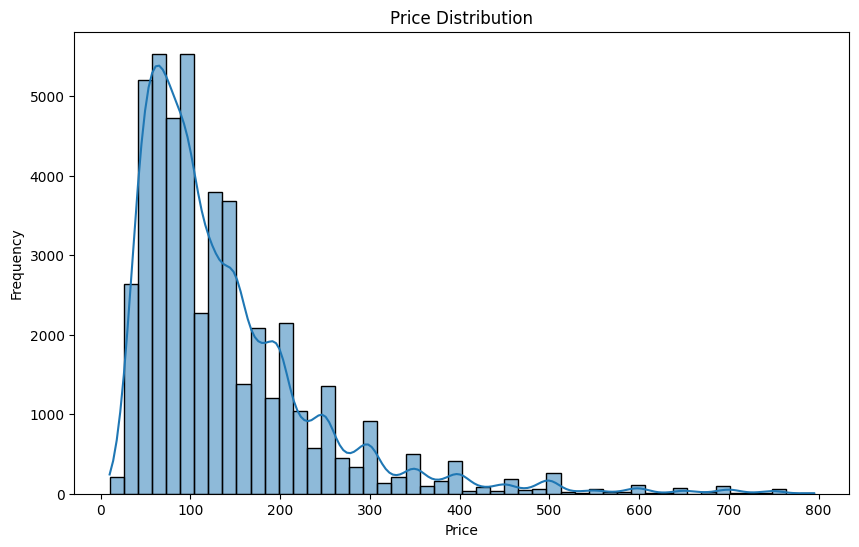

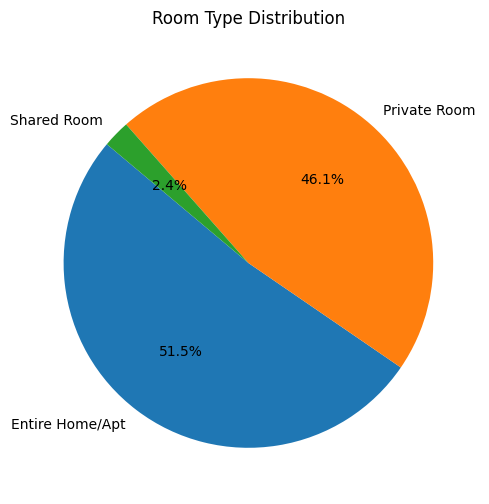

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Room type proportions
plt.figure(figsize=(8, 6))
room_type_dist.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Room Type Distribution')
plt.ylabel('')
plt.show()
